In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, join
from sqlalchemy import create_engine, func

In [5]:
# Use a direct path to avoid opening errors
database_path = "/Users/jonathanrocha/Desktop/SQL Alchemy/Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

#engine = create_engine("sqlite:///.../Resources/hawaii.sqlite")

In [6]:
#Base class using the automap function
Base=automap_base()


In [7]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables
Base.metadata.tables


immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(bind=engine)

In [34]:
session.query(Measurement.date).limit(10).all()
#session.query(Station.latitude).filter
#session.query(func.sum(Station.latitude)).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11')]

In [96]:
conn=engine.connect()
measure=pd.read_sql("SELECT * FROM Measurement",conn)
measure.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [97]:
station=pd.read_sql("SELECT * FROM Station",conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [19]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [20]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp=session.query(Measurement.prcp,Measurement.date).filter(func.DATE(Measurement.date)>='2017-01-01')
prcp.limit(10).all()

# used the solve version 10-3 solved version for the dates assignment. 

[(0.0, '2017-01-01'),
 (0.0, '2017-01-02'),
 (0.0, '2017-01-03'),
 (0.0, '2017-01-04'),
 (0.0, '2017-01-05'),
 (0.0, '2017-01-06'),
 (0.0, '2017-01-07'),
 (0.0, '2017-01-08'),
 (0.0, '2017-01-09'),
 (0.0, '2017-01-10')]

In [58]:
sel = [Measurement.date,Measurement.prcp
      ]
lastmonths = session.query(*sel).\
    filter(func.DATE(Measurement.date)>='2017-01-01').\
    group_by(Measurement.date)
       
lastmonths

In [46]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=360)
print("Query Date: ", query_date)

Query Date:  2016-08-28


In [88]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(lastmonths,columns=["date","prcp"])
prcp_df.tail()

,date,prcp
230,2017-08-19,0.0
231,2017-08-20,0.0
232,2017-08-21,0.0
233,2017-08-22,0.0
234,2017-08-23,0.0


In [65]:
# Sort the dataframe by date
srt_prcp_df=prcp_df.sort_values(["date"],ascending=False)
srt_prcp_df.head()

,date,prcp
234,2017-08-23,0.0
233,2017-08-22,0.0
232,2017-08-21,0.0
231,2017-08-20,0.0
230,2017-08-19,0.0


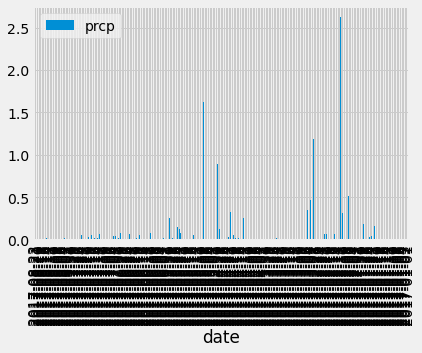

In [119]:
# Use Pandas Plotting with Matplotlib to plot the data


#srt_prcp_df.set_index('date', inplace=True )

srt_prcp_df.plot.bar()

plt.show()

In [92]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats=srt_prcp_df['prcp'].describe()
stats

count    235.000000
mean       0.052340
std        0.234127
min        0.000000
25%        0.000000
50%        0.000000
75%        0.010000
max        2.620000
Name: prcp, dtype: float64

In [95]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [106]:
# try this method to join 
join=[Measurement.station,Measurement.date,Measurement.prcp,Measurement.tobs,Station.station,Station.name,Station.latitude,
      Station.longitude,Station.elevation]
join_query=session.query(*join).filter(Measurement.station==Station.station).limit(10).all() 
    
#id	station	date	prcp	tobs----measurement
#id	station	name	latitude	longitude	elevation--------station
    


for record in join_query:
    (M_station,M_date,M_prcp,M_tobs,S_station,S_name,S_latitude,
      S_longitude,S_elevation) = record
    print(
        M_station,M_date,M_prcp,M_tobs,S_station,S_name,S_latitude,
      S_longitude,S_elevation
        )
    
    
# another form of query
session.query(Measurement.tobs,Station.name).\
    order_by(Measurement.tobs.desc())

USC00519397 2010-01-01 0.08 65.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-02 0.0 63.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-03 0.0 74.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-04 0.0 76.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-06 None 73.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-07 0.06 70.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-08 0.0 64.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-09 0.0 68.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-10 0.0 73.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00519397 2010-01-11 0.01 64.0 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0


In [127]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station,
       func.count(Measurement.station), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
avg = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(Measurement.tobs.desc()).all()
avg

[('USC00519397', 2724, 56.0, 87.0, 74.55323054331865),
 ('USC00517948', 1372, 58.0, 87.0, 74.68440233236151),
 ('USC00511918', 1979, 53.0, 87.0, 71.61596766043456),
 ('USC00519523', 2669, 56.0, 85.0, 74.5436493068565),
 ('USC00519281', 2772, 54.0, 85.0, 71.66378066378067),
 ('USC00514830', 2202, 58.0, 85.0, 74.8732970027248),
 ('USC00513117', 2709, 59.0, 85.0, 72.68918420081211),
 ('USC00516128', 2612, 58.0, 84.0, 70.91500765696784),
 ('USC00518838', 511, 58.0, 83.0, 72.72407045009784)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [131]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stat_df=pd.DataFrame(avg,columns=["Station","Count","Min Temp.","Max Temp.","Average Temp."])
stat_df.plot.hist


,Station,Count,Min Temp.,Max Temp.,Average Temp.
0,USC00519397,2724,56.0,87.0,74.553231
1,USC00517948,1372,58.0,87.0,74.684402
2,USC00511918,1979,53.0,87.0,71.615968
3,USC00519523,2669,56.0,85.0,74.543649
4,USC00519281,2772,54.0,85.0,71.663781


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
